# Galena Wagdy Zareef-20399124
# Assignment 2 - Reinforcement Learning - Windy Grid World (Sutton & Barto, pg. 130,131)


This code imports several Python modules and libraries that may be useful for scientific computing, visualization, and reinforcement learning. 

Here are some brief breakdowns of what each import does:

- `import numpy as np`: Imports the NumPy library and assigns it the alias "np". NumPy is a popular library for numerical computing in Python, and provides powerful tools for working with arrays and matrices.

- `import random`: Imports the random module, which provides functions for generating random numbers and sequences.

- `import matplotlib.pyplot as plt`: Imports the Pyplot module from the Matplotlib library, which is used for creating visualizations such as plots and charts.

- `from collections import defaultdict`: Imports the defaultdict class from the collections module, which provides a convenient way to create dictionaries with default values.

- `import gym`: Imports the OpenAI Gym library, which provides a framework for developing and comparing reinforcement learning algorithms.

- `import time`: Imports the time module, which provides functions for working with dates and times.

Overall, these imports suggest that the code may be working with numerical data, generating random numbers or sequences, visualizing data, implementing reinforcement learning algorithms, and measuring performance or adding timing delays.

In [1]:
# import libries
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import gym
import numpy as np
import time

This code defines a class called `WindyGridWorld`, which represents a simple grid world environment for reinforcement learning. Here are some details on the methods and attributes of this class:

- `__init__(self, pawn_moves=True, king_moves=False, stochastic=False)`: Initializes a new instance of the `WindyGridWorld` class with several parameters that can be used to modify the behavior of the environment. The `pawn_moves` and `king_moves` parameters control which types of actions are available to the agent, while the `stochastic` parameter controls whether the environment has stochastic transitions between states. The `start_state` and `goal_state` attributes define the starting and goal states for the agent, while the `rows` and `columns` attributes specify the size of the grid world. The `possible_actions` attribute is a dictionary that maps action names to corresponding movement vectors, depending on whether `pawn_moves` or `king_moves` are being used.

- `current_state(self, position)`: Given a tuple representing a position in the grid world, returns the corresponding state index.

- `get_next_state(self, position, action)`: Given a position and an action, returns the next state that results from taking that action from the current position. The method checks if the action is valid based on the `possible_actions` dictionary, and updates the position accordingly. The method also simulates the effect of wind on the environment, which causes the agent to be moved up by 1 or 2 units depending on the column it is in. If `stochastic` is enabled, the method adds a random component to the movement direction.

- `isTerminal(self, state)`: Given a state index, returns a boolean indicating whether that state is the goal state.

- `rewardFunction(self, next_state)`: Given a state index, returns the reward for transitioning to that state. The reward is -1 for all states except the goal state, which has a reward of 0.

Overall, this class provides a simple but useful environment for testing reinforcement learning algorithms. The ability to switch between different types of actions and enable stochastic transitions adds flexibility and allows for more complex scenarios to be modeled.

In [2]:

class WindyGridWorld:
    def __init__(self, pawn_moves = True, king_moves= False, stochastic=False):
        self.start_state = (3,0)
        self.goal_state = (3,7)
        self.rows = 7
        self.columns = 10
        self.num_of_states = self.rows * self.columns
        self.x_max = self.columns - 1
        self.y_max = self.rows - 1
        self.windy_1 = [3, 4, 5, 8]
        self.windy_2 = [6, 7]
        self.pawn_moves = pawn_moves
        self.king_moves = king_moves
        self.stochastic = stochastic

        if (self.pawn_moves and self.king_moves) or (not self.pawn_moves and not self.king_moves):
            raise Exception("only one of the value for pawn_moves and king_moves parameters must be True and the another is False, both values cannot be the same")
        if self.pawn_moves:
            self.possible_actions = {
                                        'RIGHT': (1, 0),
                                        'LEFT': (-1, 0),
                                        'UP': (0, -1),
                                        'DOWN': (0, 1)
                                    }
        elif self.king_moves:
            self.possible_actions =  {
                                                        'RIGHT': (1, 0),
                                                        'LEFT': (-1, 0),
                                                        'UP': (0, -1),
                                                        'DOWN': (0, 1),
                                                        'UP-right': (1, -1),
                                                        'UP-left': (-1, -1),
                                                        'DOWN-right': (1, 1),
                                                        'DOWN-left': (-1, 1)
                                                    }

            self.stochastic = True
        if self.pawn_moves and stochastic:
            raise Exception("This world is designed to make stochastic moves only with king_moves not pawn_moves")

    def current_state(self, position):
        return position[1] + self.columns * position[0]

    def get_next_state(self, position, action):
        pos_x = int(position % self.columns)
        pos_y = int((position - pos_x) / self.columns)
        del_x = 0;del_y = 0
        # print(action)
        # print(self.possible_actions[action] )
        del_x, del_y = self.possible_actions[action] 
        new_x = max(0, min(pos_x + del_x, self.x_max))
        new_y = max(0, min(pos_y + del_y, self.y_max))
        # When wind blows to a new state
        if new_x in self.windy_1:
            new_y = max(0, new_y - 1)
        if new_x in self.windy_2:
            new_y = max(0, new_y - 2)
            
        if self.stochastic :
            choice = np.random.choice([1,0,-1],1,p=[1/3,1/3,1/3])
            new_y = max(0, min(new_y + choice[0],self.y_max))
        # print(self.current_state((new_y,new_x)))    
        return self.current_state((new_y,new_x))
    def isTerminal(self, state):
        return state == self.current_state(self.goal_state)
    def rewardFunction(self, next_state):
        # When it reaches goal state then reward is 0 else all actions should yield -1
        if next_state == self.current_state(self.goal_state):
            return 0
        else:
            return -1

       

This code defines a function called `optimalPath` that takes several parameters and prints out the optimal path for a given grid world and path. Here are some details on the function:

- `optimalPath(world, path, algorithm, alpha, epsilon)`: Given a `WindyGridWorld` object, a path through the grid world, an algorithm name, learning rate `alpha`, and exploration parameter `epsilon`, the function prints out the optimal path using the specified algorithm, learning rate, and exploration parameter. The `world_map` variable is initialized as a 2D array of zeros with the same dimensions as the grid world, and is used to store the sequence of optimal states in the path. The `states` list is created to store the state indices in the path. The function then iterates over the path, extracts the x and y coordinates for each state, and populates the corresponding position in `world_map` with the index of the state + 1. This creates a visualization of the path as a sequence of numbers on the grid world. Finally, the function prints out this grid world visualization along with some information on the algorithm, learning rate, and exploration parameter used to generate the optimal path.

Overall, this function provides a useful way to visualize the optimal path generated by a reinforcement learning algorithm, given a specific set of parameters and a grid world environment.

In [3]:
def optimalPath(world, path,algorithm, alpha, epsilon):
    # Initialize gridworld
    world_map = np.zeros((world.rows, world.columns))
    states = []
    for i,state in enumerate(path):
        x = int(state % world.columns)
        y = int((state - x) / world.columns)
        states.append(state)
        world_map[y, x] = i + 1
    print("\n")
    print(f"Optimial path using {algorithm} with alpha: {alpha} and epsilon: {epsilon}")
    print("\n")
    print(world_map)
    print("\n")


This code defines a function called `sarsa` that implements the SARSA algorithm for reinforcement learning in the given grid world environment. Here are some details on the function:

- `sarsa(env, num_episodes, alpha=0.5, epsilon=0.1, gamma=1)`: Given a `WindyGridWorld` object, the number of episodes for which to run SARSA, a learning rate `alpha`, an exploration parameter `epsilon`, and a discount factor `gamma`, the function initializes a Q-table with zeros for all state-action pairs and loops over the specified number of episodes. Within each episode, the function initializes the starting state and action, and loops over steps until the episode terminates. At each step, the function takes the current action based on an epsilon-greedy policy using the current Q-table, observes the next state and reward, chooses the next action based on the same policy, updates the Q-table using the SARSA update rule, and updates the current state and action. The function also keeps track of the number of steps taken and the state indices visited during the episode, and appends these to the `step_ep_list` and `path` lists, respectively. Once all episodes have been completed, the function prints out the total number of steps taken, generates a grid world visualization of the optimal path using the `optimalPath` function, and plots a graph of the number of steps taken per episode. Finally, the function returns the Q-table.

- `epsilon_greedy(Q_dic, actions, epsilon)`: Given a dictionary of Q-values for a state and the possible actions, as well as an exploration parameter `epsilon`, the function chooses a random action with probability `epsilon`, or the action with the highest Q-value with probability `1-epsilon`.

Overall, this function provides a straightforward implementation of the SARSA algorithm for reinforcement learning in a grid world environment, and includes several visualizations to help understand the behavior of the algorithm.

In [4]:
def sarsa(env, num_episodes, alpha=0.5, epsilon=0.1, gamma=1):
    # Initialize Q-table
    Q = {}
    for state in range(env.rows * env.columns):
        Q[state] = {}
        for act in env.possible_actions:
            Q[state][act] = 0
    # print(Q)
    step_ep_list = []
    start_state=(3,0)
    start_time = time.time()

    # Loop over episodes
    for i in range(num_episodes):
        # Initialize state and action
        state = env.current_state(start_state)  
        # print(state);print(start_state)
        action = epsilon_greedy(Q[state], env.possible_actions, epsilon)
        visited = [];path= []
        path.append(state); visited.append(state)

        # Loop over steps within episode
        while True:
            # Take action and observe next state and reward
            # print(state)
            next_state = env.get_next_state(state,action)
            reward =  env.rewardFunction(next_state) 
            done = env.isTerminal(next_state)
            

            # Choose next action using epsilon-greedy policy
            next_action = epsilon_greedy(Q[next_state], env.possible_actions, epsilon)

            # Update Q-table
            td_target = reward + gamma * Q[next_state][next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            # Update state and action
            state = next_state
            action = next_action
            
            step_ep_list.append(i)
            path.append(state)
            visited.append(state)

            # Check if episode is done
            if done:
                break
    print(f"\nTotal number of steps taken to reach to 500 Episodes is {len(step_ep_list)}")
    optimalPath(env, path, 'SARSA with pawn moves', alpha, epsilon)
    
    
    # 
    plt.plot(step_ep_list)
    print("Time elapsed is (in Secs): " , time.time() - start_time)
    plt.title('WindyGridWorld_SARSA ', fontsize = 'large')
    plt.xlabel("Number of Steps taken")
    plt.ylabel("Number of Episodes")
    plt.show()
    # path_method(env ,path)

    # return Q

def epsilon_greedy(Q_dic, actions, epsilon):
    if np.random.uniform(0,1)  < epsilon:
        # Choose random action
        return np.random.choice(list(actions.keys()))
    else:

        return max(Q_dic, key=Q_dic.get)

This code uses a nested loop to run the SARSA algorithm on a `WindyGridWorld` environment with different values of the learning rate `alpha` and the exploration parameter `epsilon`. Here are some details on the code:

- `env = WindyGridWorld()`: Initializes a new `WindyGridWorld` object.

- `for alpha in [0.1,0.3,0.5]:`: Loops over three different values of the learning rate `alpha`: 0.1, 0.3, and 0.5.

- `for epsilone in [0.1,0.3,0.5]:`: Loops over three different values of the exploration parameter `epsilon`: 0.1, 0.3, and 0.5.

- `sarsa(env, num_episodes= 500 , alpha=alpha, epsilon=epsilone, gamma=1)`: Calls the `sarsa` function with the specified `WindyGridWorld` environment, number of episodes, learning rate `alpha`, exploration parameter `epsilon`, and discount factor `gamma=1`. The function prints out the optimal path and a graph of the number of steps taken per episode for each combination of `alpha` and `epsilon`.

Overall, this code provides a way to test the performance of the SARSA algorithm on a `WindyGridWorld` environment with different values of the learning rate and exploration parameter, and to visualize the resulting optimal paths and learning curves.


Plot for Option: ∈=0.1,α=0.1
/n

Total number of steps taken to reach to 500 Episodes is 30662


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.1


[[ 0.  0.  0.  0.  0.  0. 26. 27. 28. 29.]
 [ 8.  5.  0.  0.  0.  0. 25.  0.  0. 30.]
 [ 9.  0.  0.  0.  0.  0.  0.  0.  0. 31.]
 [10.  0.  0.  0.  0. 24.  0. 40.  0. 32.]
 [13. 14.  0.  0. 22.  0.  0.  0.  0. 33.]
 [12. 15.  0. 21.  0.  0.  0.  0. 39. 37.]
 [18. 19. 20.  0.  0.  0.  0.  0.  0. 38.]]


Time elapsed is (in Secs):  0.4194614887237549


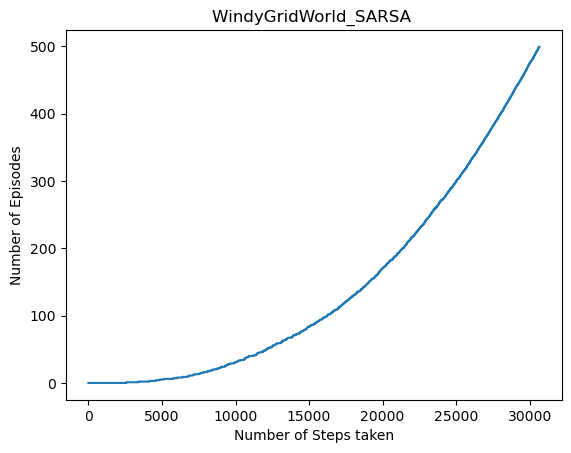

Plot for Option: ∈=0.1,α=0.3
/n

Total number of steps taken to reach to 500 Episodes is 38239


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.3


[[ 0.  0.  0.  6.  7.  8. 21. 22. 30. 31.]
 [ 0.  0.  0.  5.  0.  0.  0. 20.  0. 32.]
 [ 0.  0.  4.  0.  0.  0.  0. 19.  0. 33.]
 [ 1.  2.  3.  0.  0.  0.  0. 44.  0. 34.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 18. 35.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 43. 41.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 42.]]


Time elapsed is (in Secs):  0.6910743713378906


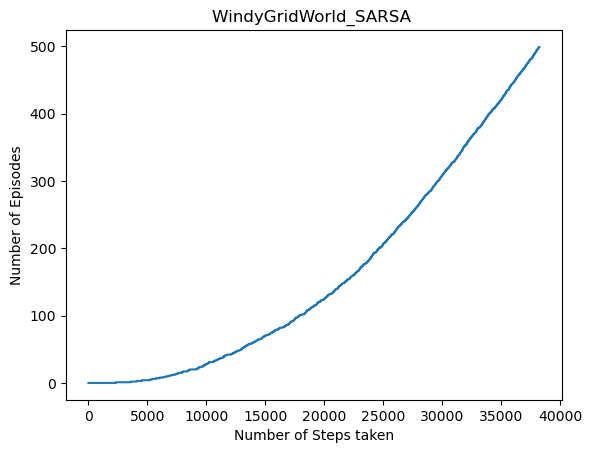

Plot for Option: ∈=0.1,α=0.5
/n

Total number of steps taken to reach to 500 Episodes is 60296


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.5


[[ 0.  0.  0. 12. 13. 17. 18. 19. 23. 24.]
 [ 0.  0.  0.  9.  0.  0.  0.  0.  0. 25.]
 [ 0.  7.  8.  0.  0.  0.  0.  0.  0. 26.]
 [ 1.  6.  0.  0.  0.  0.  0. 37.  0. 27.]
 [ 0.  3.  0.  0.  0.  0.  0.  0.  0. 28.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 36. 33.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 35.]]


Time elapsed is (in Secs):  1.2893893718719482


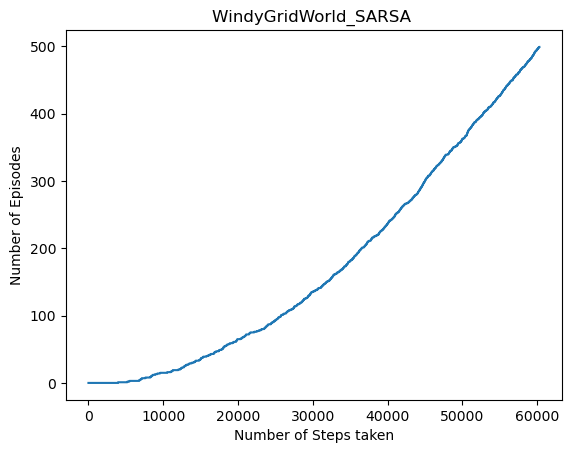

Plot for Option: ∈=0.3,α=0.1
/n

Total number of steps taken to reach to 500 Episodes is 18056


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.1


[[ 0.  0.  0.  6.  7.  9. 11. 12. 13. 14.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  0. 15.]
 [ 0.  3.  4.  0.  0.  0.  0.  0.  0. 16.]
 [ 1.  2.  0.  0.  0.  0.  0. 22.  0. 17.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 21. 19.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]


Time elapsed is (in Secs):  0.23453736305236816


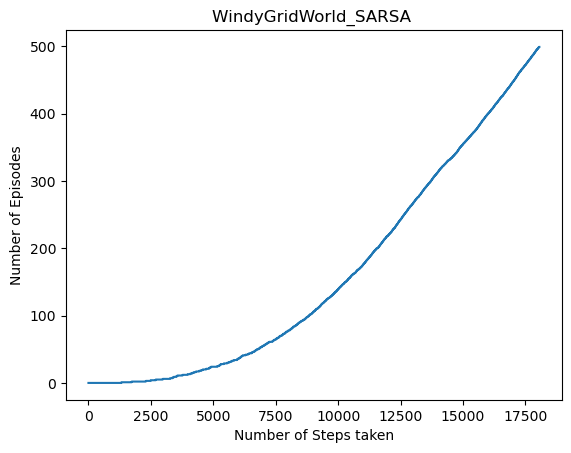

Plot for Option: ∈=0.3,α=0.3
/n

Total number of steps taken to reach to 500 Episodes is 25242


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.3


[[ 0.  0.  0.  7.  8.  9. 10. 11. 12. 14.]
 [ 0.  0.  0.  6.  0.  0.  0.  0.  0. 16.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0. 17.]
 [ 2.  3.  4.  0.  0.  0.  0. 23.  0. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 19.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 22. 20.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 21.]]


Time elapsed is (in Secs):  0.4423532485961914


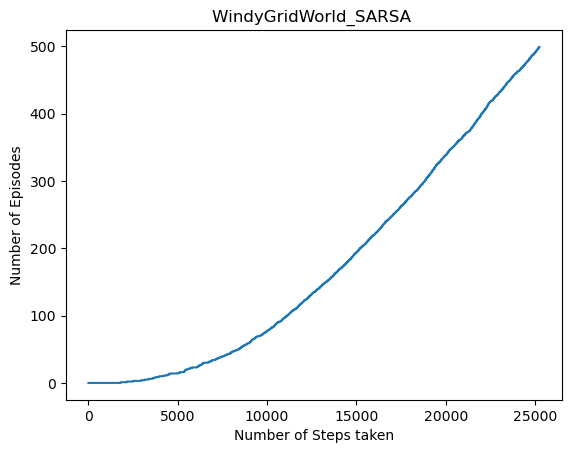

Plot for Option: ∈=0.3,α=0.5
/n

Total number of steps taken to reach to 500 Episodes is 44108


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.5


[[38. 39. 45. 47. 48. 49. 51. 52. 54. 55.]
 [ 0. 40. 43.  0.  8.  0.  0.  0. 63. 64.]
 [ 0. 26. 42. 29.  0.  0.  0.  0.  0. 65.]
 [ 1. 27. 28.  0.  0.  0.  0. 72. 60. 66.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 68.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 71. 69.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 70.]]


Time elapsed is (in Secs):  1.0229356288909912


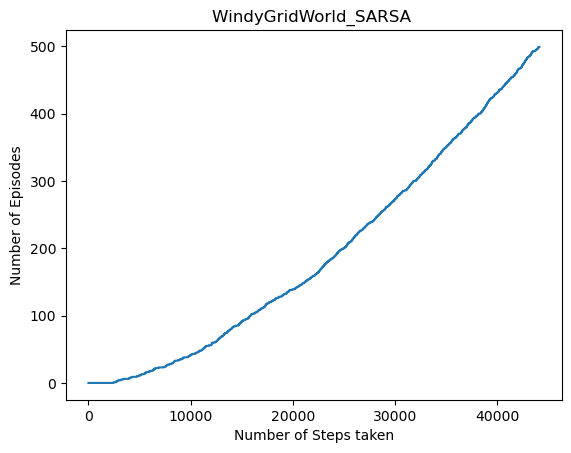

Plot for Option: ∈=0.5,α=0.1
/n

Total number of steps taken to reach to 500 Episodes is 15924


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.1


[[ 0.  0.  0.  0.  6.  7.  8.  9. 10. 11.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  0. 12.]
 [ 2.  3.  4.  0.  0.  0.  0.  0.  0. 13.]
 [ 1.  0.  0.  0.  0.  0.  0. 19.  0. 14.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 15.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 18. 16.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 17.]]


Time elapsed is (in Secs):  0.20320343971252441


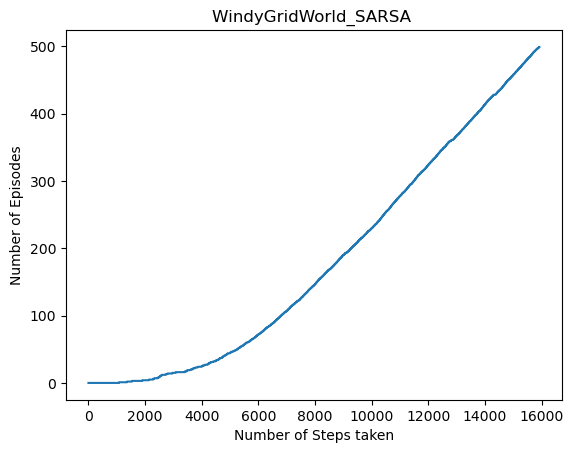

Plot for Option: ∈=0.5,α=0.3
/n

Total number of steps taken to reach to 500 Episodes is 24990


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.3


[[ 0.  0.  0.  0.  0.  0. 16. 17. 18. 19.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]
 [ 0.  0.  0.  0.  0. 15.  0.  0. 63. 68.]
 [ 1.  0.  0.  0. 14.  0.  0. 82. 46. 69.]
 [ 7.  8.  9. 13.  0.  0.  0.  0. 62. 70.]
 [ 6. 11. 12.  0.  0.  0.  0.  0. 81. 71.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 80.]]


Time elapsed is (in Secs):  0.4635334014892578


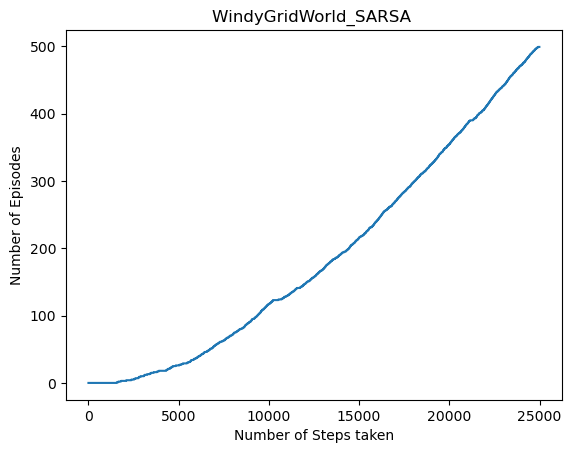

Plot for Option: ∈=0.5,α=0.5
/n

Total number of steps taken to reach to 500 Episodes is 47237


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.5


[[ 0.  0.  0. 16. 19. 20. 22. 23. 24. 25.]
 [ 0.  0.  0. 15.  0.  0.  0.  0.  0. 26.]
 [ 0.  0.  0.  0. 14.  0.  0.  0.  0. 27.]
 [ 2.  0.  0.  0.  0.  0.  0. 35.  0. 28.]
 [ 3.  0.  0.  0. 13.  0.  0.  0.  0. 29.]
 [ 8.  9.  6. 12.  0.  0.  0.  0. 34. 30.]
 [ 0. 10. 11.  0.  0.  0.  0.  0.  0. 33.]]


Time elapsed is (in Secs):  2.2424426078796387


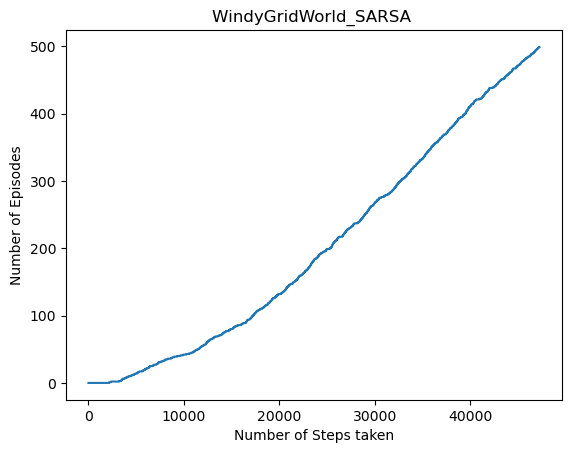

In [5]:
env = WindyGridWorld()
for alpha in [0.1,0.3,0.5]:
    for epsilone in [0.1,0.3,0.5]:
        print("Plot for Option: ∈={},α={}".format(alpha,epsilone))
        print("/n")
        sarsa(env, num_episodes= 500 , alpha=alpha, epsilon=epsilone, gamma=1)


This code uses a nested loop to run the SARSA algorithm on a modified `WindyGridWorld` environment with king moves and stochastic transitions, and with different values of the learning rate `alpha` and the exploration parameter `epsilon`. Here are some details on the code:

- `env = WindyGridWorld(pawn_moves= False , king_moves= True, stochastic=True)`: Initializes a new `WindyGridWorld` object with king moves and stochastic transitions enabled.

- `for alpha in [0.1,0.3,0.5]:`: Loops over three different values of the learning rate `alpha`: 0.1, 0.3, and 0.5.

- `for epsilone in [0.1,0.3,0.5]:`: Loops over three different values of the exploration parameter `epsilon`: 0.1, 0.3, and 0.5.

- `sarsa(env, num_episodes= 500 , alpha=alpha, epsilon=epsilone, gamma=1)`: Calls the `sarsa` function with the specified `WindyGridWorld` environment, number of episodes, learning rate `alpha`, exploration parameter `epsilon`, and discount factor `gamma=1`. The function prints out the optimal path and a graph of the number of steps taken per episode for each combination of `alpha` and `epsilon`.

Overall, this code provides a way to test the performance of the SARSA algorithm on a modified `WindyGridWorld` environment with king moves and stochastic transitions, and to visualize the resulting optimal paths and learning curves for different values of the learning rate and exploration parameter.

Plot for Option: ∈=0.1,α=0.1
/n

Total number of steps taken to reach to 500 Episodes is 57302


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.1


[[ 0.  0.  0.  0.  0.  0.  0. 38.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 39.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 34. 35. 40.]
 [ 1.  0. 20.  9.  0.  0.  0. 54. 47. 41.]
 [ 2. 17. 10. 19. 23. 24. 25. 33. 50. 44.]
 [ 0. 11. 21. 22.  0.  0.  0. 53. 52. 49.]
 [ 6.  7. 14.  0.  0.  0.  0.  0.  0. 51.]]


Time elapsed is (in Secs):  3.2509381771087646


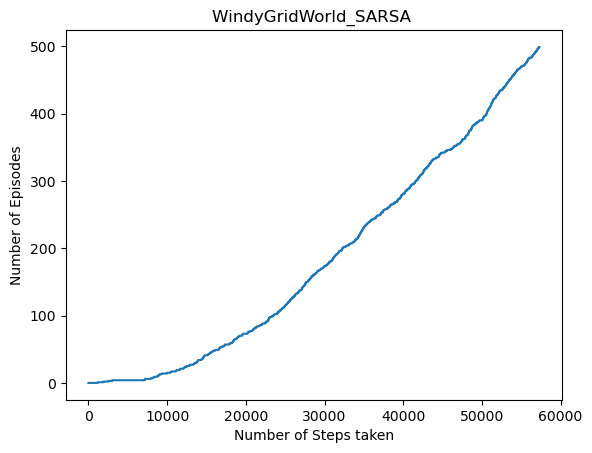

Plot for Option: ∈=0.1,α=0.3
/n

Total number of steps taken to reach to 500 Episodes is 65328


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.3


[[44. 40. 36. 34. 32.  0.  0. 76. 77. 69.]
 [12. 43. 39. 33. 30. 31. 75. 74. 70. 79.]
 [46. 13.  0.  0. 29.  0.  0. 65.  0.  0.]
 [ 1.  0.  0.  0.  0. 28.  0. 83.  0. 80.]
 [50. 14. 19. 26. 60.  0.  0.  0.  0. 81.]
 [48. 56. 23. 58. 61. 62. 63. 64. 82.  0.]
 [55. 49. 57.  0. 25.  0.  0.  0.  0.  0.]]


Time elapsed is (in Secs):  3.7287933826446533


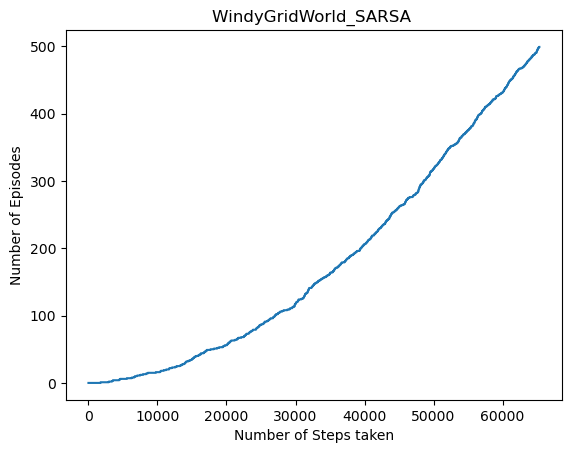

Plot for Option: ∈=0.1,α=0.5
/n

Total number of steps taken to reach to 500 Episodes is 81692


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.5


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0. 10. 11.  0.  0.]
 [ 0.  2.  5.  0.  8.  9.  0.  0.  0.  0.]
 [ 0.  0.  6.  7.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Time elapsed is (in Secs):  4.607873916625977


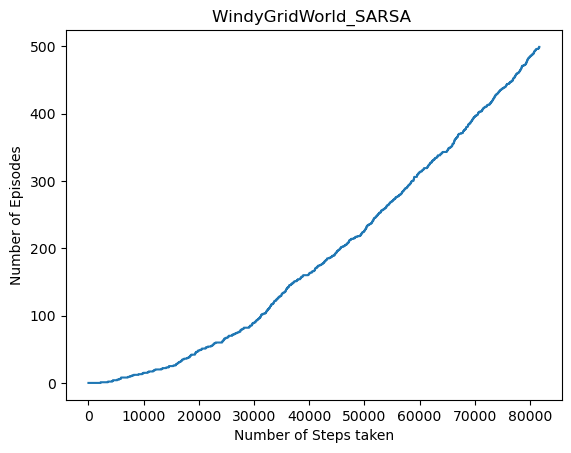

Plot for Option: ∈=0.3,α=0.1
/n

Total number of steps taken to reach to 500 Episodes is 38349


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.1


[[ 17.  16.   0.  36.  37.  38.  39.  40.  83.  53.]
 [ 25.  11.  12.   0.   0.   0.   0.  82.  41.   0.]
 [ 26.  34.  35.   7.   0.   0.   0.  77.  78.  85.]
 [ 24.  27.  29.  31.   0.   0.   0. 104.  81.  87.]
 [  0.  20.   3.   0.   5.   0.   0.  95. 101. 100.]
 [  0.  21.  30.   4.   6.   0.   0.   0. 103.  99.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 102.]]


Time elapsed is (in Secs):  1.8122727870941162


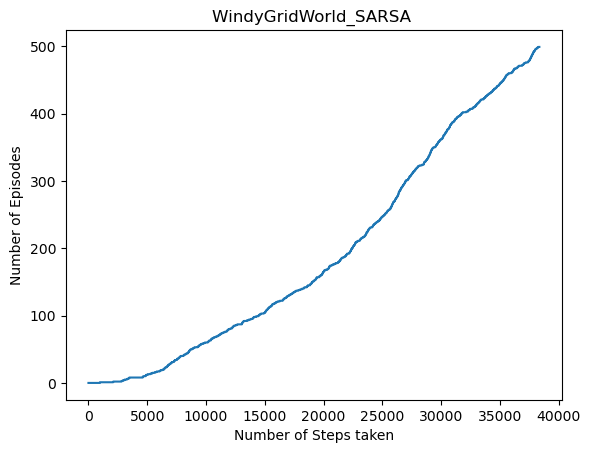

Plot for Option: ∈=0.3,α=0.3
/n

Total number of steps taken to reach to 500 Episodes is 53390


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.3


[[ 0.  0.  0.  0.  0.  0. 25. 26. 33. 34.]
 [ 0.  0.  0.  0.  0.  0.  0. 32. 40. 28.]
 [ 0.  0.  0.  0.  0. 24.  0.  0. 29. 39.]
 [ 4.  7.  0.  0.  0.  0.  0. 45.  0. 41.]
 [ 0.  5. 17.  0. 22.  0.  0.  0.  0. 42.]
 [ 3. 13. 16. 18. 23.  0.  0.  0. 44.  0.]
 [12. 11.  0.  0.  0.  0.  0.  0.  0. 43.]]


Time elapsed is (in Secs):  2.723036050796509


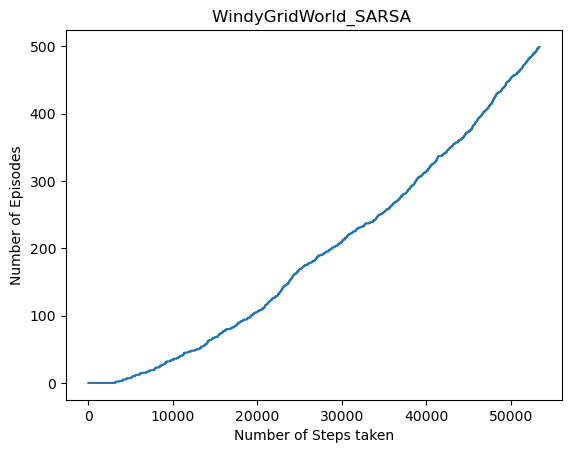

Plot for Option: ∈=0.3,α=0.5
/n

Total number of steps taken to reach to 500 Episodes is 72930


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.5


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 44. 19.]
 [ 7.  8.  0.  0.  0.  0.  0. 43. 40. 46.]
 [ 4.  0.  9.  0.  0.  0.  0. 50. 49. 47.]
 [ 0.  3.  0. 10.  0.  0.  0. 31. 38. 48.]
 [ 0.  0. 11. 12. 13.  0. 30. 29. 32. 36.]
 [ 0.  0.  0.  0.  0. 14.  0.  0.  0. 34.]]


Time elapsed is (in Secs):  4.055482387542725


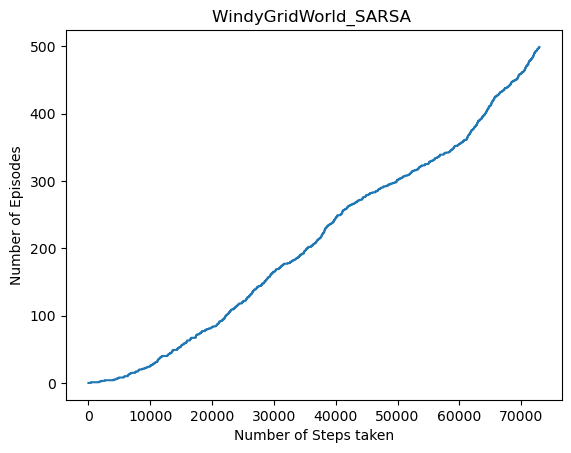

Plot for Option: ∈=0.5,α=0.1
/n

Total number of steps taken to reach to 500 Episodes is 37941


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.1


[[18.  0. 20. 21. 36. 46. 47.  0. 51. 52.]
 [28. 27. 26. 25. 22. 41. 48. 49.  0. 53.]
 [17.  0.  0. 31. 32.  0.  0.  0. 50. 54.]
 [16. 29.  0.  0.  0.  0.  0. 60.  0.  0.]
 [15. 14. 30.  0.  0.  0.  0.  0.  0. 55.]
 [ 4.  0. 11.  0.  0.  0.  0. 58. 59. 56.]
 [ 8. 13.  0.  0.  0.  0.  0.  0. 57.  0.]]


Time elapsed is (in Secs):  1.7890050411224365


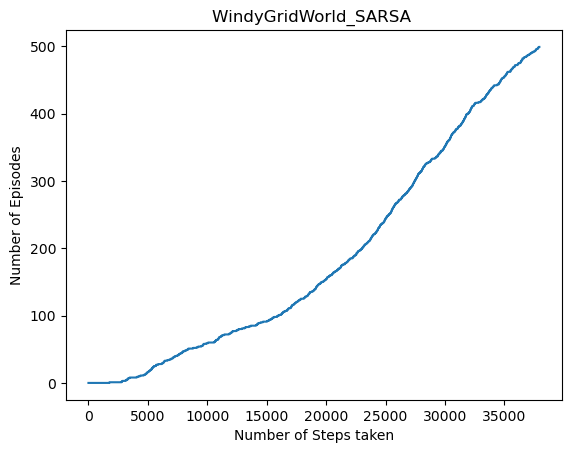

Plot for Option: ∈=0.5,α=0.3
/n

Total number of steps taken to reach to 500 Episodes is 57481


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.3


[[ 0.  0. 10. 12. 13. 16. 36. 37. 43. 44.]
 [ 0.  6. 11.  0.  0. 35. 17. 53. 54. 41.]
 [ 0.  0.  8.  0.  0.  0.  0. 33.  0. 47.]
 [ 1.  5.  0.  0.  0.  0.  0. 61.  0. 55.]
 [ 0.  0.  4.  0.  0.  0.  0.  0. 32. 57.]
 [ 0.  0.  0.  0.  0.  0.  0. 52. 60. 50.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 59.]]


Time elapsed is (in Secs):  2.96217679977417


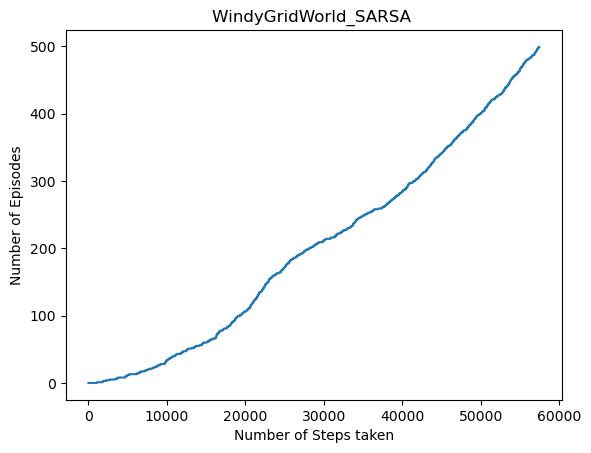

Plot for Option: ∈=0.5,α=0.5
/n

Total number of steps taken to reach to 500 Episodes is 84927


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.5


[[  0. 121. 120. 156. 118. 117. 167. 168. 175. 180.]
 [123.  87. 141. 157. 162. 113. 112. 170. 171. 178.]
 [ 95. 145. 140. 139. 104. 163. 160.   0. 174. 181.]
 [150. 146. 144. 135. 155. 103. 191. 192.   0. 173.]
 [151.  93.  69. 154. 134. 133.   0. 190.   0. 187.]
 [126. 152. 136. 131.  24.   0.   0.   0. 189.   0.]
 [ 91.  81. 153.   0.  12.   0.   0.   0.   0. 188.]]


Time elapsed is (in Secs):  4.683924674987793


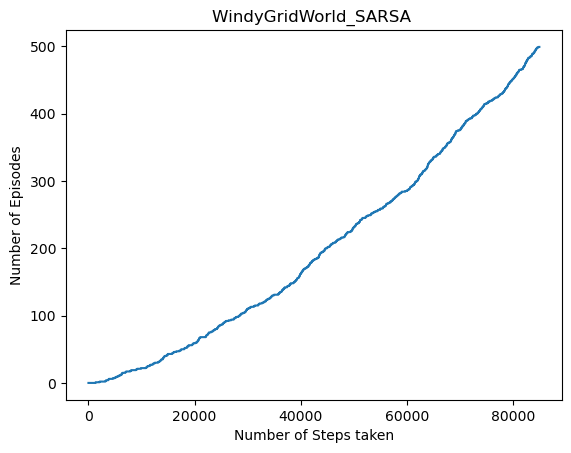

In [6]:
env = WindyGridWorld(pawn_moves= False , king_moves= True, stochastic=True)
for alpha in [0.1,0.3,0.5]:
    for epsilone in [0.1,0.3,0.5]:
        print("Plot for Option: ∈={},α={}".format(alpha,epsilone))
        print("/n")
        sarsa(env, num_episodes= 500 , alpha=alpha, epsilon=epsilone, gamma=1)

This code defines a function called `Qlearn` that implements the Q-learning algorithm for reinforcement learning in the given grid world environment. Here are some details on the function:

- `Qlearn(env, num_episodes, alpha=0.5, epsilon=0.1, gamma=1)`: Given a `WindyGridWorld` object, the number of episodes for which to run Q-learning, a learning rate `alpha`, an exploration parameter `epsilon`, and a discount factor `gamma`, the function initializes a Q-table with zeros for all state-action pairs and loops over the specified number of episodes. Within each episode, the function initializes the starting state and action, and loops over steps until the episode terminates. At each step, the function takes the current action based on an epsilon-greedy policy using the current Q-table, observes the next state and reward, chooses the next action greedily using the current Q-table, updates the Q-table using the Q-learning update rule, and updates the current state and action. The function also keeps track of the number of steps taken and the state indices visited during the episode, and appends these to the `step_ep_list` and `path` lists, respectively. Once all episodes have been completed, the function prints out the total number of steps taken, generates a grid world visualization of the optimal path using the `optimalPath` function, and plots a graph of the number of steps taken per episode. Finally, the function returns the Q-table.

- `epsilon_greedy(Q_dic, actions, epsilon)`: Given a dictionary of Q-values for a state and the possible actions, as well as an exploration parameter `epsilon`, the function chooses a random action with probability `epsilon`, or the action with the highest Q-value with probability `1-epsilon`.

Overall, this function provides a straightforward implementation of the Q-learning algorithm for reinforcement learning in a grid world environment, and includes several visualizations to help understand the behavior of the algorithm.

In [7]:

def Qlearn(env, num_episodes, alpha=0.5, epsilon=0.1, gamma=1):
    # Initialize Q-table
    Q = {}
    for state in range(env.rows * env.columns):
        Q[state] = {}
        for act in env.possible_actions:
            Q[state][act] = 0
    # print(Q)
    step_ep_list = []
    start_time = time.time()

    # Loop over episodes
    for i in range(num_episodes):
        # Initialize state and action
        state = env.current_state(env.start_state)  
        # print(state)
        action = epsilon_greedy(Q[state], env.possible_actions, epsilon)
        path= []
        path.append(state)

        # Loop over steps within episode
        while True:
            # Take action and observe next state and reward
            # print(state)
            next_state = env.get_next_state(state,action)
            reward =  env.rewardFunction(next_state) 
            done = env.isTerminal(next_state)
            

            # Choose next action using epsilon-greedy policy
            next_action = epsilon_greedy(Q[next_state], env.possible_actions, epsilon)

            # Update Q-table
            td_target = reward + gamma * max(Q[next_state].values())
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            # Update state and action
            state = next_state
            action = next_action
            step_ep_list.append(i)
            path.append(state)

            # Check if episode is done
            if done:
                break
        # print("HI")
    print(f"\nTotal number of steps taken to reach to 500 Episodes is {len(step_ep_list)}")
    optimalPath(env, path, 'SARSA with pawn moves', alpha, epsilon)
    # optimalPath(env, 'SARSA with pawn moves',step_ep_list,number_of_steps)

    plt.plot(step_ep_list)
    print("Time elapsed is (in Secs): " , time.time() - start_time)
    plt.title('WindyGridWorld_QLearn ', fontsize = 'large')
    plt.xlabel("Number of Steps taken")
    plt.ylabel("Number of Episodes")
    plt.show()

def epsilon_greedy(Q_dic, actions, epsilon):
    if np.random.uniform(0,1)  < epsilon:
        # Choose random action

        return np.random.choice(list(actions.keys()))
    else:
        # Choose greedy action
        return max(Q_dic, key=Q_dic.get)

This code uses a nested loop to run the Q-learning algorithm on a `WindyGridWorld` environment with different values of the learning rate `alpha` and the exploration parameter `epsilon`. Here are some details on the code:

- `env = WindyGridWorld()`: Initializes a new `WindyGridWorld` object.

- `for alpha in [0.1,0.3,0.5]:`: Loops over three different values of the learning rate `alpha`: 0.1, 0.3, and 0.5.

- `for epsilone in [0.1,0.3,0.5]:`: Loops over three different values of the exploration parameter `epsilon`: 0.1, 0.3, and 0.5.

- `Qlearn(env, num_episodes= 500 , alpha=alpha, epsilon=epsilone, gamma=1)`: Calls the `Qlearn` function with the specified `WindyGridWorld` environment, number of episodes, learning rate `alpha`, exploration parameter `epsilon`, and discount factor `gamma=1`. The function prints out the optimal path and a graph of the number of steps taken per episode for each combination of `alpha` and `epsilon`.

Overall, this code provides a way to test the performance of the Q-learning algorithm on a `WindyGridWorld` environment with different values of the learning rate and exploration parameter, and to visualize the resulting optimal paths and learning curves.

Plot for Option: ∈=0.1,α=0.1 


Total number of steps taken to reach to 500 Episodes is 30124


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.1


[[ 0.  0.  0.  0.  0.  9. 10. 11. 15. 16.]
 [ 0.  0.  0.  0.  8.  0.  0.  0.  0. 17.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  0. 18.]
 [ 1.  4.  5.  0.  0.  0.  0. 24.  0. 19.]
 [ 2.  3.  0.  0.  0.  0.  0.  0.  0. 20.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 23. 21.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 22.]]


Time elapsed is (in Secs):  0.33463287353515625


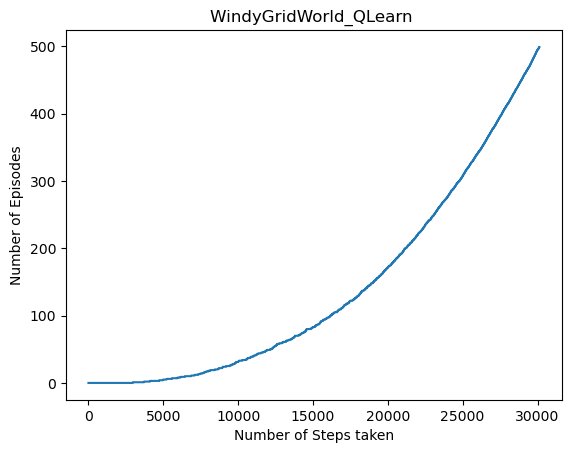

Plot for Option: ∈=0.1,α=0.3 


Total number of steps taken to reach to 500 Episodes is 34128


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.3


[[ 0.  0.  0.  0.  0.  0. 13. 14. 23. 24.]
 [ 0.  0.  0.  0.  0.  0. 12.  0.  0. 25.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 28. 29.]
 [ 1.  0.  0.  0.  0. 11.  0. 40. 33. 34.]
 [ 2.  0.  0.  0. 10.  0.  0.  0.  0. 35.]
 [ 3.  4.  0.  9.  0.  0.  0.  0. 39. 36.]
 [ 6.  7.  8.  0.  0.  0.  0.  0.  0. 38.]]


Time elapsed is (in Secs):  0.5803582668304443


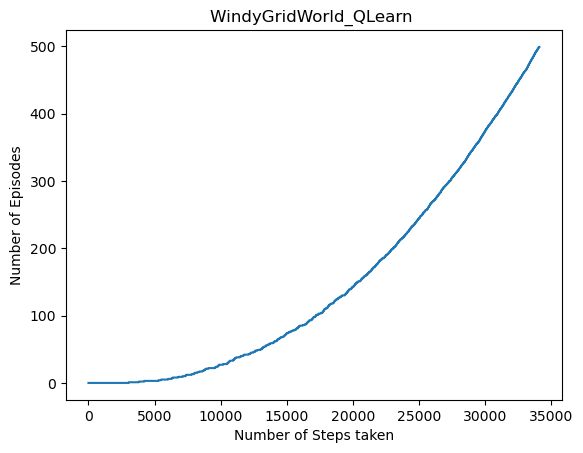

Plot for Option: ∈=0.1,α=0.5 


Total number of steps taken to reach to 500 Episodes is 44322


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.5


[[ 0.  0.  0.  0.  6.  7.  8.  9. 23. 24.]
 [ 0.  0.  0.  5.  0.  0.  0.  0. 21. 25.]
 [ 0.  3.  4.  0.  0.  0.  0.  0.  0. 26.]
 [ 1.  2.  0.  0.  0.  0.  0. 37. 31. 32.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 33.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 36. 34.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 35.]]


Time elapsed is (in Secs):  0.9043126106262207


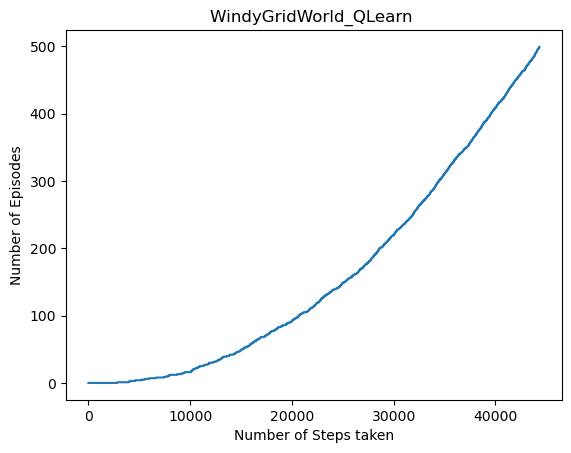

Plot for Option: ∈=0.3,α=0.1 


Total number of steps taken to reach to 500 Episodes is 17127


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.1


[[ 0.  0.  0.  0.  0.  6.  8.  9. 10. 14.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0. 15.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0. 16.]
 [ 1.  2.  3.  0.  0.  0.  0. 22.  0. 17.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 21. 19.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]


Time elapsed is (in Secs):  0.17211270332336426


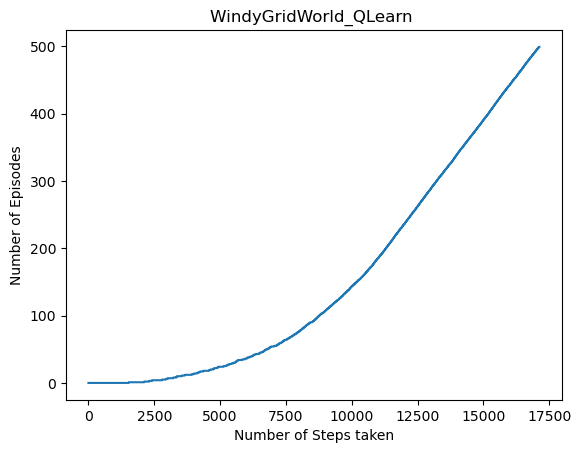

Plot for Option: ∈=0.3,α=0.3 


Total number of steps taken to reach to 500 Episodes is 21042


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.3


[[ 0.  0.  0. 14. 15. 18. 20. 21. 22. 23.]
 [ 0.  0.  0.  0.  7.  0.  0.  0.  0. 24.]
 [ 0.  0.  0.  6.  0.  0.  0.  0.  0. 25.]
 [ 3.  4.  5.  0.  0.  0.  0. 42. 36. 37.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 38.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 41. 39.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 40.]]


Time elapsed is (in Secs):  0.29807400703430176


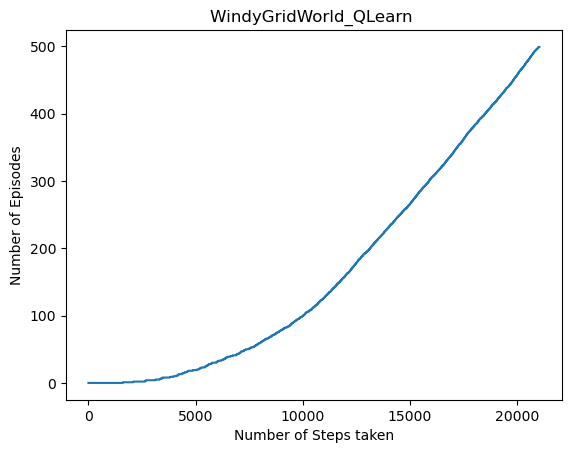

Plot for Option: ∈=0.3,α=0.5 


Total number of steps taken to reach to 500 Episodes is 31360


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.5


[[ 0.  0.  0.  0.  6.  7.  8.  9. 14. 15.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  0. 16.]
 [ 2.  3.  4.  0.  0.  0.  0.  0.  0. 17.]
 [ 1.  0.  0.  0.  0.  0.  0. 30.  0. 25.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 21. 26.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 29. 27.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 28.]]


Time elapsed is (in Secs):  0.5333969593048096


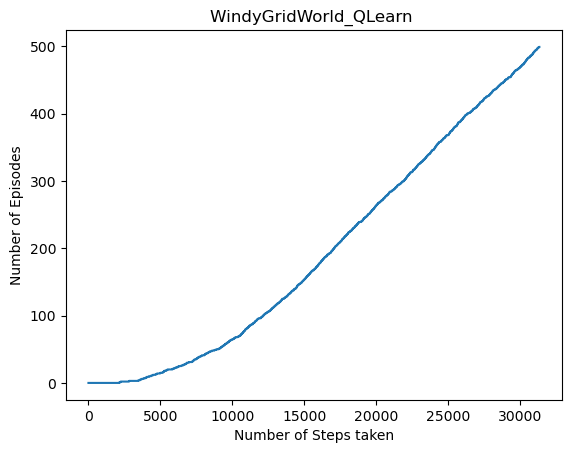

Plot for Option: ∈=0.5,α=0.1 


Total number of steps taken to reach to 500 Episodes is 14416


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.1


[[ 0.  0.  0.  0.  0.  6.  7.  8.  9. 10.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0. 13.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0. 14.]
 [ 1.  2.  3.  0.  0.  0.  0. 21.  0. 15.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 16.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 20. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 19.]]


Time elapsed is (in Secs):  0.15660929679870605


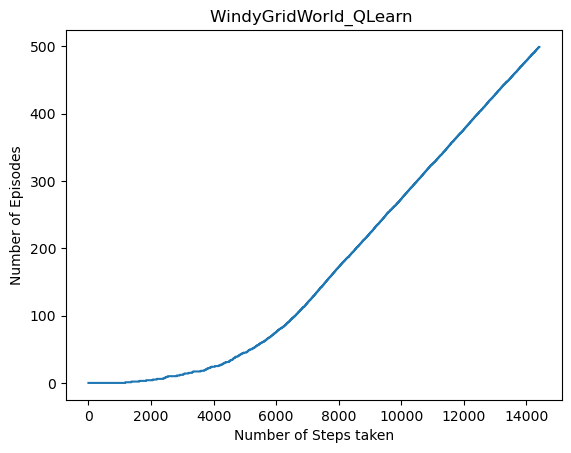

Plot for Option: ∈=0.5,α=0.3 


Total number of steps taken to reach to 500 Episodes is 18581


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.3


[[ 0.  0.  0.  0.  0.  0. 11. 20. 21. 22.]
 [ 0.  0.  0.  0.  0.  8.  0.  0. 25. 27.]
 [ 0.  0.  0.  0.  6.  0.  0.  0. 19. 28.]
 [ 1.  2.  0.  5.  0.  0.  0. 36.  0. 31.]
 [ 0.  3.  4.  0.  0.  0.  0.  0.  0. 32.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 35. 33.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 34.]]


Time elapsed is (in Secs):  0.2581007480621338


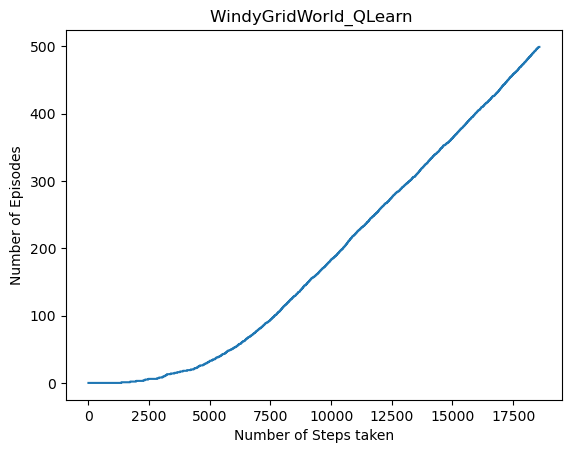

Plot for Option: ∈=0.5,α=0.5 


Total number of steps taken to reach to 500 Episodes is 29731


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.5


[[ 0.  0.  0.  0.  0. 17. 22. 23. 26. 27.]
 [ 0.  0.  0.  0.  0.  0. 13.  0.  0. 28.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 31.]
 [ 1.  0.  0.  0.  0. 12.  0. 40.  0. 32.]
 [ 2.  0.  0.  0. 11.  0.  0.  0.  0. 33.]
 [ 3.  4.  0.  9.  0.  0.  0.  0. 39. 37.]
 [ 0.  7.  8.  0.  0.  0.  0.  0.  0. 38.]]


Time elapsed is (in Secs):  0.5164282321929932


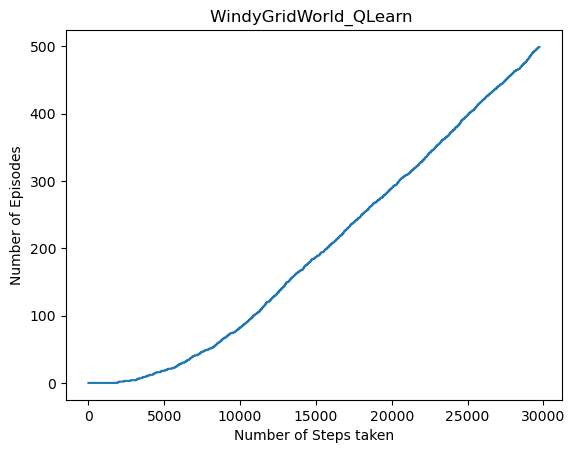

In [8]:
env = WindyGridWorld()
for alpha in [0.1,0.3,0.5]:
    for epsilone in [0.1,0.3,0.5]:
        print("Plot for Option: ∈={},α={} \n".format(alpha,epsilone))
        Qlearn(env, num_episodes= 500 , alpha=alpha, epsilon=epsilone, gamma=1)

This code uses a nested loop to run the Q-learning algorithm on a modified `WindyGridWorld` environment with king moves and stochastic transitions, and with different values of the learning rate `alpha` and the exploration parameter `epsilon`. Here are some details on the code:

- `env = WindyGridWorld(pawn_moves= False , king_moves= True, stochastic=True)`: Initializes a new `WindyGridWorld` object with king moves and stochastic transitions enabled.

- `for alpha in [0.1,0.3,0.5]:`: Loops over three different values of the learning rate `alpha`: 0.1, 0.3, and 0.5.

- `for epsilone in [0.1,0.3,0.5]:`: Loops over three different values of the exploration parameter `epsilon`: 0.1, 0.3, and 0.5.

- `Qlearn(env, num_episodes= 500 , alpha=alpha, epsilon=epsilone, gamma=1)`: Calls the `Qlearn` function with the specified `WindyGridWorld` environment, number of episodes, learning rate `alpha`, exploration parameter `epsilon`, and discount factor `gamma=1`. The function prints out the optimal path and a graph of the number of steps taken per episode for each combination of `alpha` and `epsilon`.

Overall, this code provides a way to test the performance of the Q-learning algorithm on a modified `WindyGridWorld` environment with king moves and stochastic transitions, and to visualize the resulting optimal paths and learning curves for different values of the learning rate and exploration parameter.

Plot for Option: ∈=0.1,α=0.1 


Total number of steps taken to reach to 500 Episodes is 58983


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.1


[[ 0.  0.  0.  0.  8.  9. 10. 11. 12.  0.]
 [ 0.  0.  0.  0.  0.  7.  0.  0.  0. 13.]
 [ 0.  0.  0.  0.  6.  0.  0.  0.  0. 15.]
 [ 1.  0.  0.  0.  0.  0.  0. 24.  0. 17.]
 [ 0.  0.  3.  5.  0.  0.  0.  0.  0. 19.]
 [ 0.  2.  0.  0.  0.  0.  0. 23.  0. 20.]
 [ 0.  0.  4.  0.  0.  0.  0.  0. 21.  0.]]


Time elapsed is (in Secs):  3.0036795139312744


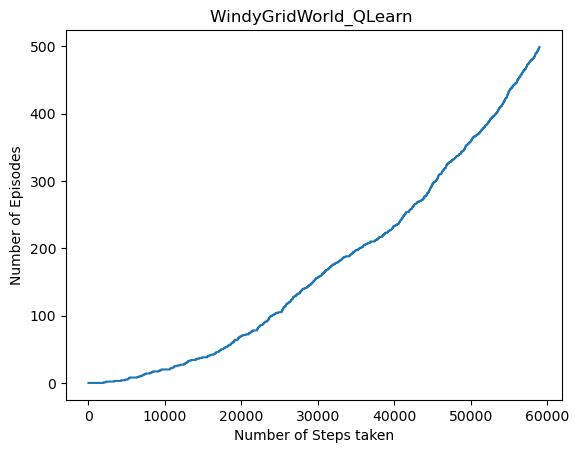

Plot for Option: ∈=0.1,α=0.3 


Total number of steps taken to reach to 500 Episodes is 60569


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.3


[[ 0.  0.  0.  0.  0. 14. 18. 19. 23. 36.]
 [ 0.  0.  0.  0.  0. 16. 17. 20. 34. 37.]
 [ 0.  0.  0.  0. 12. 11.  0.  0. 28. 29.]
 [ 1.  0.  0.  0.  0. 10.  0. 45.  0. 38.]
 [ 0.  2.  0.  6.  7.  8.  0.  0.  0. 42.]
 [ 0.  4.  5.  0.  0.  0.  0.  0.  0. 41.]
 [ 0.  0.  3.  0.  0.  0.  0.  0. 44. 43.]]


Time elapsed is (in Secs):  3.1744091510772705


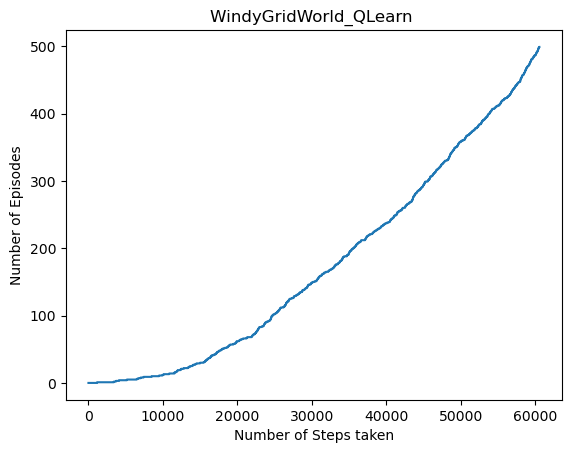

Plot for Option: ∈=0.1,α=0.5 


Total number of steps taken to reach to 500 Episodes is 71843


Optimial path using SARSA with pawn moves with alpha: 0.1 and epsilon: 0.5


[[ 0.  0.  0.  0.  0.  0. 17. 18. 65. 68.]
 [ 0.  0.  0. 14. 15. 16.  0.  0. 59. 70.]
 [ 0.  0. 10.  0.  0.  0.  0. 40. 76. 51.]
 [ 3.  4. 13.  0.  8.  0.  0. 82. 72. 77.]
 [ 2.  0.  0.  6.  0.  0.  0. 79. 78. 55.]
 [ 0.  0.  5.  0.  0.  0.  0. 81. 80. 73.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Time elapsed is (in Secs):  3.9804489612579346


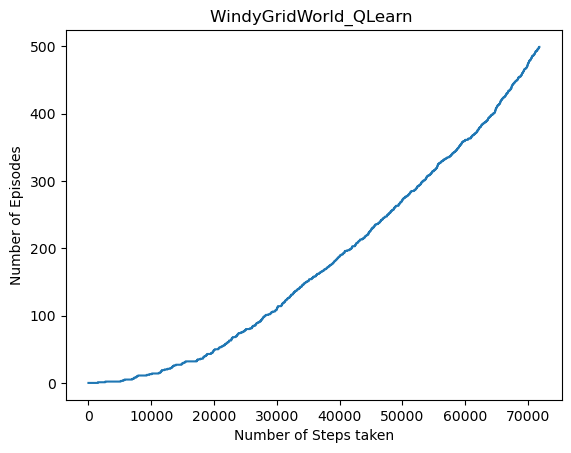

Plot for Option: ∈=0.3,α=0.1 


Total number of steps taken to reach to 500 Episodes is 35644


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.1


[[ 0.  0.  0.  0.  0.  0.  0. 22. 23. 24.]
 [ 0.  0.  0.  0.  0.  0.  0.  8.  0. 10.]
 [ 0.  2.  0.  4.  5.  6. 21.  0.  0. 25.]
 [ 1.  0.  3.  0.  0.  0.  0. 37. 34. 28.]
 [ 0.  0.  0.  0.  0.  0.  0. 33. 17. 29.]
 [ 0.  0.  0.  0.  0.  0.  0. 32. 31. 35.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 36. 16.]]


Time elapsed is (in Secs):  1.6831886768341064


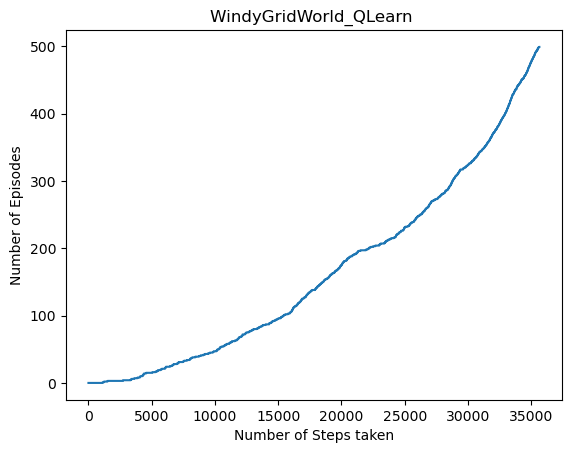

Plot for Option: ∈=0.3,α=0.3 


Total number of steps taken to reach to 500 Episodes is 40706


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.3


[[ 0.  0.  0.  0.  0.  0.  0. 11. 28. 30.]
 [ 0.  0.  0.  0.  0.  0.  0. 27. 19.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  9.  0. 33.]
 [ 1.  0.  0.  0.  0.  0. 26. 38.  0. 20.]
 [ 0.  2.  0.  0.  0.  0.  7. 25.  0. 35.]
 [ 0.  0.  3.  0.  5.  0.  0. 23. 22. 36.]
 [ 0.  0.  0.  4.  0.  6.  0.  0. 37.  0.]]


Time elapsed is (in Secs):  2.166975498199463


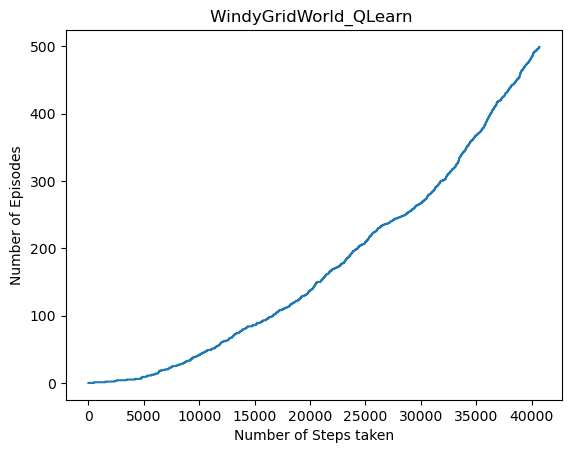

Plot for Option: ∈=0.3,α=0.5 


Total number of steps taken to reach to 500 Episodes is 55851


Optimial path using SARSA with pawn moves with alpha: 0.3 and epsilon: 0.5


[[ 0.  0.  0. 13. 14. 15. 16. 17. 18.  0.]
 [ 0.  0.  0.  0. 12.  9.  0.  0. 19.  0.]
 [ 0.  0.  0.  0.  0.  7.  0.  0.  0. 21.]
 [ 1.  0.  0.  0.  0.  0.  0. 28.  0. 23.]
 [ 2.  0.  0.  0.  6.  0.  0.  0. 25. 24.]
 [ 0.  0.  0.  5.  0.  0.  0.  0. 27. 26.]
 [ 0.  3.  4.  0.  0.  0.  0.  0.  0.  0.]]


Time elapsed is (in Secs):  3.1164393424987793


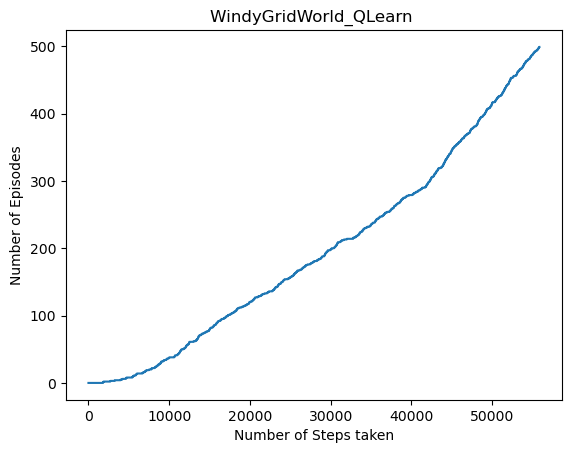

Plot for Option: ∈=0.5,α=0.1 


Total number of steps taken to reach to 500 Episodes is 34998


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.1


[[ 0.  0.  0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  9.  0. 11.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  0.]
 [ 1.  0.  3.  0.  6.  0.  0. 20.  0. 12.]
 [ 0.  2.  4.  5.  0.  0.  0. 19.  0. 14.]
 [ 0.  0.  0.  0.  0.  0.  0. 18. 16.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 15.]]


Time elapsed is (in Secs):  1.7083046436309814


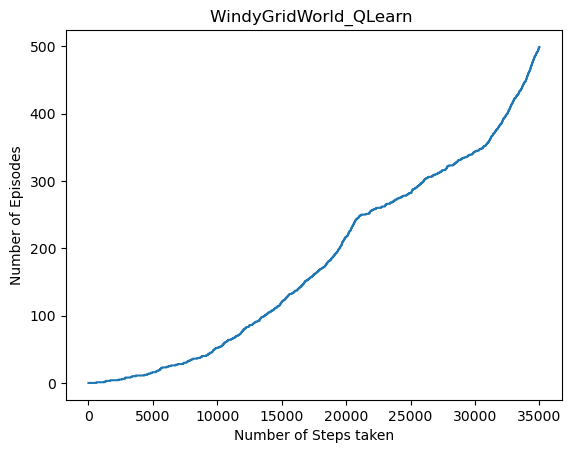

Plot for Option: ∈=0.5,α=0.3 


Total number of steps taken to reach to 500 Episodes is 41420


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.3


[[ 0.  0.  0.  0.  0. 10. 15. 77. 17.  0.]
 [ 0.  0.  0.  0.  9. 14.  0. 16. 78. 33.]
 [ 0.  0.  0.  0.  0.  0.  0. 68. 79. 29.]
 [ 2.  0.  0.  0.  6.  8.  0. 87. 75. 80.]
 [ 0.  3.  4.  5.  0.  7.  0. 55. 84. 85.]
 [ 0.  0.  0.  0.  0.  0.  0. 61. 86. 81.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 62. 83.]]


Time elapsed is (in Secs):  2.2013847827911377


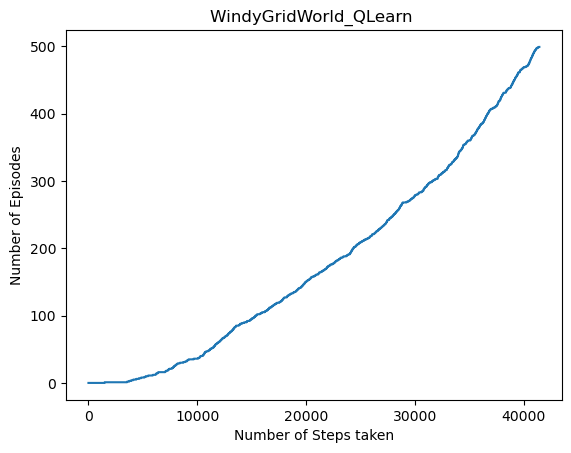

Plot for Option: ∈=0.5,α=0.5 


Total number of steps taken to reach to 500 Episodes is 57638


Optimial path using SARSA with pawn moves with alpha: 0.5 and epsilon: 0.5


[[ 0.  0.  0.  0.  0. 12.  0. 14. 20. 21.]
 [ 0.  0.  0.  0. 11.  0. 13.  0.  0. 22.]
 [ 0.  0.  9. 10.  0.  0.  0.  0.  0. 24.]
 [ 1.  0.  0.  0.  0.  0.  0. 28.  0.  0.]
 [ 0.  8.  0.  0.  0.  0.  0.  0.  0. 25.]
 [ 0.  6.  0.  0.  0.  0.  0.  0. 27. 26.]
 [ 3.  0.  7.  0.  0.  0.  0.  0.  0.  0.]]


Time elapsed is (in Secs):  3.2541115283966064


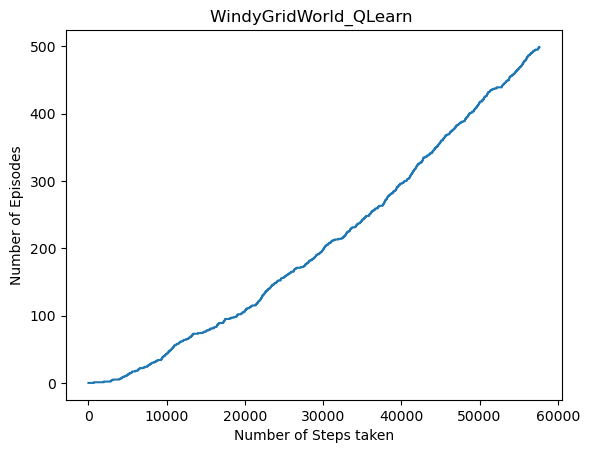

In [9]:
env = WindyGridWorld(pawn_moves= False , king_moves= True, stochastic=True)
for alpha in [0.1,0.3,0.5]:
    for epsilone in [0.1,0.3,0.5]:
        print("Plot for Option: ∈={},α={} \n".format(alpha,epsilone))
        Qlearn(env, num_episodes= 500 , alpha=alpha, epsilon=epsilone, gamma=1)